In [1]:
import os
import modal
#import great_expectations as ge
import hopsworks
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
project = hopsworks.login()
fs = project.get_feature_store()

titanic_df = pd.read_csv("https://raw.githubusercontent.com/ID2223KTH/id2223kth.github.io/master/assignments/lab1/titanic.csv")

Connected. Call `.close()` to terminate connection gracefully.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/5359


Connected. Call `.close()` to terminate connection gracefully.


In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#summary summary
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# fill missing values with mean column values for int and float columns
titanic_df.fillna(titanic_df.median(), inplace=True)
# fill missing values with mode column values for object columns
titanic_df.fillna(titanic_df.mode().iloc[0], inplace=True)

In [6]:
#summary summary
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
titanic_df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

array([<AxesSubplot: title={'center': 'female'}>,
       <AxesSubplot: title={'center': 'male'}>], dtype=object)

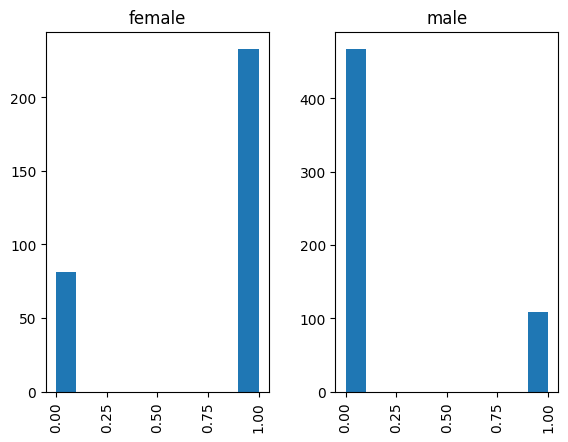

In [8]:
titanic_df.hist(column="Survived",by="Sex")

<AxesSubplot: >

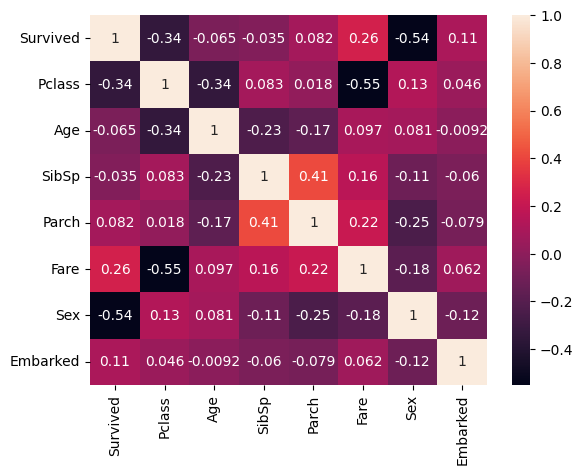

In [9]:
#plot correlation matrix between ints and floats features
#For sex transform to 0 and 1
titanic_df['Sex'].replace('female', 0,inplace=True)
titanic_df['Sex'].replace('male', 1,inplace=True)
titanic_df['Sex'].astype(int)

titanic_df['Embarked'].replace('S', 0,inplace=True)
titanic_df['Embarked'].replace('C', 1,inplace=True)
titanic_df['Embarked'].replace('Q', 2,inplace=True) 
titanic_df['Embarked'].astype(int)
# get correlations between numerical features
corr = titanic_df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch','Fare', 'Sex', 'Embarked']].corr()
# plot the heatmap and annotation on it
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)

In [10]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


In [11]:
titanic_df['Age_bin'] = pd.cut(titanic_df['Age'], bins=[0,12,20,40,120], labels=['kid','teen','adult','elder'])
titanic_df = pd.get_dummies(titanic_df, columns=["Age_bin"], prefix=["Age_type"])

In [12]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_type_kid,Age_type_teen,Age_type_adult,Age_type_elder
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,B96 B98,0,0,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,0,0,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,B96 B98,0,0,0,1,0


In [13]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_type_kid,Age_type_teen,Age_type_adult,Age_type_elder
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.361582,0.523008,0.381594,32.204208,0.361392,0.077441,0.123457,0.630752,0.168350
std,257.353842,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429,0.635673,0.267440,0.329146,0.482872,0.374387
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,0.000000,0.000000,0.000000,1.000000,0.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
titanic_df["Fare_bin"] = pd.cut(titanic_df['Fare'], bins=[0,7.9104,14.4542,31.0,520], labels=['low','low_med','high_med','high'])
titanic_df = pd.get_dummies(titanic_df, columns=["Fare_bin"], prefix=["Fare_type"])

In [15]:
#drop passenger id and Name
titanic_df = titanic_df.drop(['PassengerId', 'Name', 'Cabin', 'Ticket', "Age", "Fare"], axis=1)


In [16]:
titanic_df.head(20)

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Age_type_kid,Age_type_teen,Age_type_adult,Age_type_elder,Fare_type_low,Fare_type_low_med,Fare_type_high_med,Fare_type_high
0,0,3,1,1,0,0,0,0,1,0,1,0,0,0
1,1,1,0,1,0,1,0,0,1,0,0,0,0,1
2,1,3,0,0,0,0,0,0,1,0,0,1,0,0
3,1,1,0,1,0,0,0,0,1,0,0,0,0,1
4,0,3,1,0,0,0,0,0,1,0,0,1,0,0
5,0,3,1,0,0,2,0,0,1,0,0,1,0,0
6,0,1,1,0,0,0,0,0,0,1,0,0,0,1
7,0,3,1,3,1,0,1,0,0,0,0,0,1,0
8,1,3,0,0,2,0,0,0,1,0,0,1,0,0
9,1,2,0,1,0,1,0,1,0,0,0,0,1,0


In [17]:
# #Write the features to the feature store as a Feature Group


# titanic_fg = fs.get_or_create_feature_group(
#     name="titanic_modal",
#     version=8,
#     primary_key=["Pclass", "ArithmeticError", "SibSp", "Parch", "Fare", "Cabin", "Embarked", "Sex",
#                 'Age_type_kid', "Age_type_teen", "Age_type_adult", "Age_type_elder",
#                 "Fare_type_low", "Fare_type_low_med", "Fare_type_high_med", "Fare_type_high"],
#     description="titanic dataset")
# titanic_fg.insert(titanic_df, write_options={"wait_for_job" : False})

In [18]:
df_ = titanic_df.copy()

In [19]:
age_type_cols = ["Age_type_kid", "Age_type_teen", "Age_type_adult", "Age_type_elder"]
age_labels = df_[age_type_cols].to_numpy()
age_labels = np.argmax(age_labels, axis=1)
df_["Age_type"] = age_labels
df_.head(10)

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Age_type_kid,Age_type_teen,Age_type_adult,Age_type_elder,Fare_type_low,Fare_type_low_med,Fare_type_high_med,Fare_type_high,Age_type
0,0,3,1,1,0,0,0,0,1,0,1,0,0,0,2
1,1,1,0,1,0,1,0,0,1,0,0,0,0,1,2
2,1,3,0,0,0,0,0,0,1,0,0,1,0,0,2
3,1,1,0,1,0,0,0,0,1,0,0,0,0,1,2
4,0,3,1,0,0,0,0,0,1,0,0,1,0,0,2
5,0,3,1,0,0,2,0,0,1,0,0,1,0,0,2
6,0,1,1,0,0,0,0,0,0,1,0,0,0,1,3
7,0,3,1,3,1,0,1,0,0,0,0,0,1,0,0
8,1,3,0,0,2,0,0,0,1,0,0,1,0,0,2
9,1,2,0,1,0,1,0,1,0,0,0,0,1,0,1


In [20]:
fare_type_cols = ["Fare_type_low", "Fare_type_low_med", "Fare_type_high_med", "Fare_type_high"]
fare_labels = df_[fare_type_cols].to_numpy()
fare_labels = np.argmax(fare_labels, axis=1)
df_["Fare_type"] = fare_labels
df_.head(10)

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Age_type_kid,Age_type_teen,Age_type_adult,Age_type_elder,Fare_type_low,Fare_type_low_med,Fare_type_high_med,Fare_type_high,Age_type,Fare_type
0,0,3,1,1,0,0,0,0,1,0,1,0,0,0,2,0
1,1,1,0,1,0,1,0,0,1,0,0,0,0,1,2,3
2,1,3,0,0,0,0,0,0,1,0,0,1,0,0,2,1
3,1,1,0,1,0,0,0,0,1,0,0,0,0,1,2,3
4,0,3,1,0,0,0,0,0,1,0,0,1,0,0,2,1
5,0,3,1,0,0,2,0,0,1,0,0,1,0,0,2,1
6,0,1,1,0,0,0,0,0,0,1,0,0,0,1,3,3
7,0,3,1,3,1,0,1,0,0,0,0,0,1,0,0,2
8,1,3,0,0,2,0,0,0,1,0,0,1,0,0,2,1
9,1,2,0,1,0,1,0,1,0,0,0,0,1,0,1,2


In [21]:
cols_to_drop = age_type_cols + fare_type_cols
df_ = df_.drop(cols_to_drop, axis=1)
df_.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Age_type,Fare_type
0,0,3,1,1,0,0,2,0
1,1,1,0,1,0,1,2,3
2,1,3,0,0,0,0,2,1
3,1,1,0,1,0,0,2,3
4,0,3,1,0,0,0,2,1


In [22]:
total_rows = df_.shape[0]
total_rows

891

In [23]:
columns = ["Pclass", "Sex", "SibSp", "Parch", "Embarked", "Age_type", "Fare_type"]


def get_percentage_distribution(df):
    for group_name, group in df.groupby("Survived"):
        print(group_name)
        for col in columns:
            values = group[col].value_counts(normalize=True).sort_index()
            print(values)

In [24]:
get_percentage_distribution(df_)

0
1    0.145719
2    0.176685
3    0.677596
Name: Pclass, dtype: float64
0    0.147541
1    0.852459
Name: Sex, dtype: float64
0    0.724954
1    0.176685
2    0.027322
3    0.021858
4    0.027322
5    0.009107
8    0.012750
Name: SibSp, dtype: float64
0    0.810565
1    0.096539
2    0.072860
3    0.003643
4    0.007286
5    0.007286
6    0.001821
Name: Parch, dtype: float64
0    0.777778
1    0.136612
2    0.085610
Name: Embarked, dtype: float64
0    0.052823
1    0.123862
2    0.650273
3    0.173042
Name: Age_type, dtype: float64
0    0.326047
1    0.284153
2    0.220401
3    0.169399
Name: Fare_type, dtype: float64
1
1    0.397661
2    0.254386
3    0.347953
Name: Pclass, dtype: float64
0    0.681287
1    0.318713
Name: Sex, dtype: float64
0    0.614035
1    0.327485
2    0.038012
3    0.011696
4    0.008772
Name: SibSp, dtype: float64
0    0.681287
1    0.190058
2    0.116959
3    0.008772
5    0.002924
Name: Parch, dtype: float64
0    0.640351
1    0.271930
2    0.087719
Name: Em